In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train classifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [2]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels (species)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipeline with a scaler, PCA, and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('pca', PCA()),  # Apply PCA
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression model
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [2, 3, 4],  # Try different numbers of principal components
    'classifier__C': [0.01, 0.1, 1, 10]  # Regularization parameter for Logistic Regression
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Best Parameters: {'classifier__C': 1, 'pca__n_components': 3}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy Score: 1.0


Coefficients: 
 [[2.98842657]]
Intercept: 
 [2.0044241]
Mean squared error: 0.01


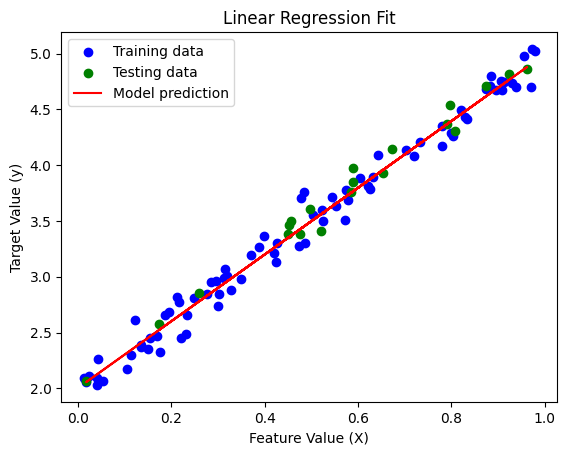

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some data
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 2 + 3 * X + np.random.randn(100, 1) * 0.1  # y = 2 + 3X + noise

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Plotting the results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test, y_pred, color='red', label='Model prediction')
plt.xlabel('Feature Value (X)')
plt.ylabel('Target Value (y)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

Log Loss: 0.5718790391801958


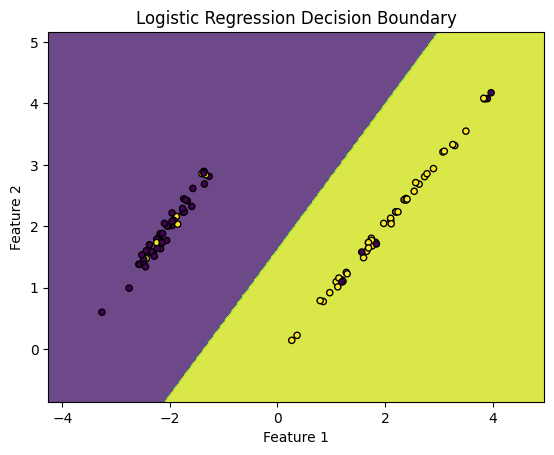

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data for binary classification
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob = model.predict_proba(X_test)

# Calculate log loss on the test set
loss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {loss}")

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

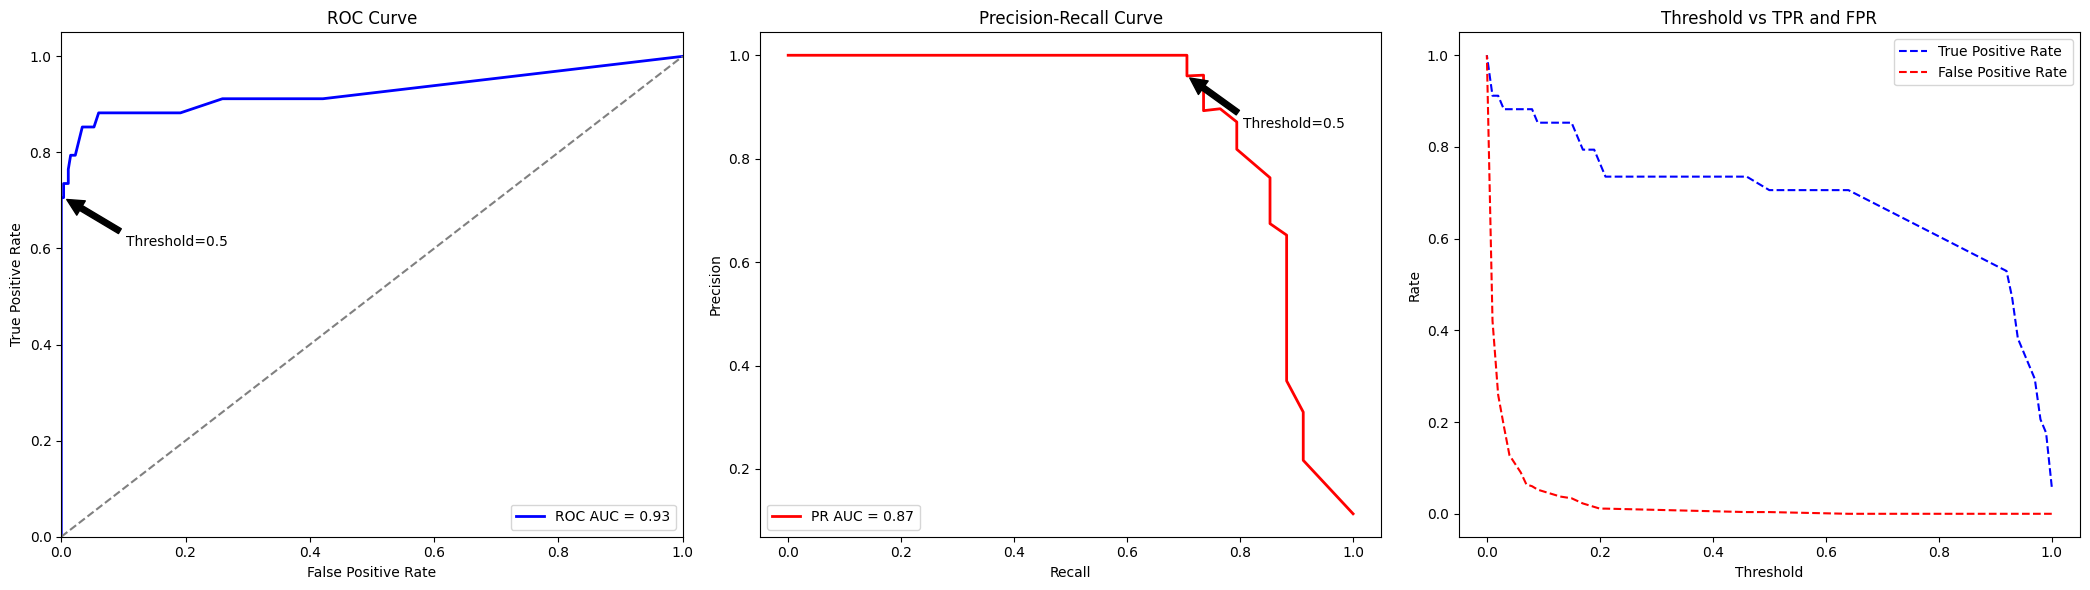

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, weights=[0.9], flip_y=0, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot ROC Curve and Precision-Recall Curve with Thresholds
plt.figure(figsize=(21, 6))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Find index where threshold is closest to 0.5 for ROC
threshold_idx_roc = np.argmin(np.abs(thresholds_roc - 0.5))
plt.annotate(f'Threshold=0.5', xy=(fpr[threshold_idx_roc], tpr[threshold_idx_roc]),
             xytext=(fpr[threshold_idx_roc] + 0.1, tpr[threshold_idx_roc] - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='red', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Find index where threshold is closest to 0.5 for Precision-Recall
threshold_idx_pr = np.argmin(np.abs(thresholds_pr - 0.5))
plt.annotate(f'Threshold=0.5', xy=(recall[threshold_idx_pr], precision[threshold_idx_pr]),
             xytext=(recall[threshold_idx_pr] + 0.1, precision[threshold_idx_pr] - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Threshold vs. TPR and FPR
plt.subplot(1, 3, 3)
plt.plot(thresholds_roc, tpr, 'b--', label='True Positive Rate')
plt.plot(thresholds_roc, fpr, 'r--', label='False Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Threshold vs TPR and FPR')
plt.legend(loc='best')

plt.tight_layout()
plt.show()